<a href="https://colab.research.google.com/github/AditiDas1601/QOSF-Task-1/blob/main/QOSF_Task_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Naive simulation using matrix multiplication

# Importing the required packages

In [1]:
import numpy as np
import time
import matplotlib.pyplot as plt

# Initialising the matrices required

This is the CNOT matrix that CXGate provides us with in IBM Documentation where the first qubit is the target and the second qubit is the control qubit. We will use this in our computation for np.kron() method. The other CNOT matrix can also be implemented using (P0 ⊗ I) + (P1 ⊗ X ) (where P0 is the projector onto |0> state and P1 is the projector onto |1> state). But we use the CNOT gate initialised for tensor method.

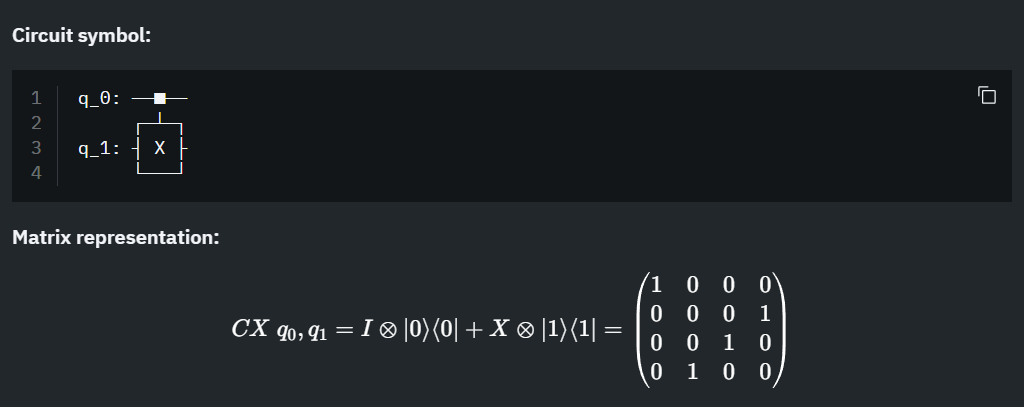

In [2]:
X_gate = np.array([[0, 1], [1, 0]])# X gate matrix
H_gate = (1 / np.sqrt(2)) * np.array([[1, 1], [1, -1]])# H gate matrix
I = np.array([[1, 0], [0, 1]])  # Identity matrix
#CNOT gate for a two-qubit system
CNOT_gate = np.array([[1, 0, 0, 0],
                      [0, 1, 0, 0],
                      [0, 0, 0, 1],
                      [0, 0, 1, 0]])

# Creating initial state for n qubits

In [3]:
def n_qubit_zero_state(n):
    # Starting with the state vector for a single qubit in the |0⟩ state
    qubit_0 = np.array([1, 0])

    # Using the Kronecker product to create an n-qubit |00...0⟩ state
    state = qubit_0
    for _ in range(n - 1):
        state = np.kron(state, qubit_0)
    return state

# Creating n qubit X gate:

In [4]:
def n_qubit_x_gate(n):
  gate_X=X_gate
  for _ in range(n - 1):
        gate_X = np.kron(gate_X, X_gate)
  return gate_X

# Creating n qubit H gate:

In [5]:
def n_qubit_h_gate(n):
  gate_H=H_gate
  for _ in range(n - 1):
        gate_H = np.kron(gate_H, H_gate)
  return gate_H

# Creating n qubit CNOT gate using 2 qubit CNOT matrix:



In [6]:
def n_qubit_cnot_gate(n):
  P0 = np.array([[1, 0], [0, 0]])  # Projector onto |0>
  P1 = np.array([[0, 0], [0, 1]])  # Projector onto |1>
  # For instance, for 3-qubit CNOT = (I ⊗ I ⊗ P0) + (X ⊗I ⊗ P1 )
  #Dividing the sum into two parts: 'first' and 'second'
  first=P0
  second=P1
  for i in range (n-1):
    first=np.kron(I,first)
    if(i==0):
      second=np.kron(X_gate,second)
    else:
      second=np.kron(I,second)
  cnot_gate=first+second
  return cnot_gate

## Computing the sequential circuit and calculating the time it takes as number of qubits increase:

In [7]:
naive_total_begin=time.time()
t_kron=np.zeros(13)
for n in range(2,15): # code crashes for number of qubits > 14
  begin = time.time()
  appl_X=np.transpose(np.dot(n_qubit_x_gate(n),n_qubit_zero_state(n)))
  #print(appl_X)
  appl_H=np.transpose(np.dot(n_qubit_h_gate(n),appl_X))
  #print(appl_H)
  appl_CNOT=np.transpose(np.dot(n_qubit_cnot_gate(n),appl_H))
  #print(appl_CNOT)
  end = time.time()
  t_kron[n-2]=(end-begin)
naive_total_end=time.time()
print(naive_total_end-naive_total_begin)

22.806629419326782


# Plotting the time taken to compute the circuit vs. number of qubits

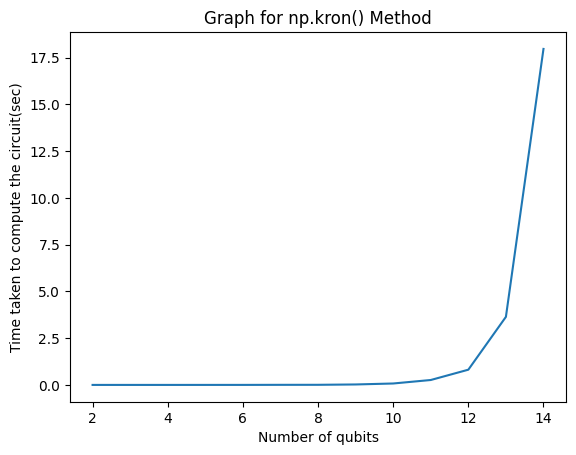

In [8]:
num_qubits=np.arange(2,15)
plt.title('Graph for np.kron() Method')
plt.xlabel('Number of qubits')
plt.ylabel('Time taken to compute the circuit(sec)')
plt.plot(num_qubits, t_kron)
plt.show()

# Demonstrating the sequential circuit being used but for 3 qubits

Installing Qiskit



In [9]:
!pip install qiskit

Demonstrating the circuit done  for 3 qubits:

In [10]:
from qiskit import QuantumCircuit
qc=QuantumCircuit(3)
qc.x(0)
qc.h(0)
qc.x(1)
qc.h(1)
qc.x(2)
qc.h(2)
qc.cx(0,2)
qc.measure_all()
qc.draw()

┌───┐┌───┐      ░ ┌─┐      
   q_0: ┤ X ├┤ H ├──■───░─┤M├──────
        ├───┤├───┤  │   ░ └╥┘┌─┐   
   q_1: ┤ X ├┤ H ├──┼───░──╫─┤M├───
        ├───┤├───┤┌─┴─┐ ░  ║ └╥┘┌─┐
   q_2: ┤ X ├┤ H ├┤ X ├─░──╫──╫─┤M├
        └───┘└───┘└───┘ ░  ║  ║ └╥┘
meas: 3/═══════════════════╩══╩══╩═
                           0  1  2

In [11]:
qc.remove_final_measurements()  # no measurements allowed
from qiskit.quantum_info import Statevector
statevector = Statevector(qc)
print(statevector)

Statevector([ 0.35355339+0.j,  0.35355339+0.j, -0.35355339+0.j,
             -0.35355339+0.j, -0.35355339+0.j, -0.35355339+0.j,
              0.35355339+0.j,  0.35355339+0.j],
            dims=(2, 2, 2))


# Advanced simulation using tensor multiplication

# Creating initial state for n qubits and reshaping it into a tensor

In [12]:
def n_qubit_tensor(n):
  zero_vector=n_qubit_zero_state(n)
  # Reshaping the state vector into an n-dimensional tensor
  tensor_shape = (2,) * n
  #print(tensor_shape)
  ZS_tensor = zero_vector.reshape(tensor_shape)
  return ZS_tensor

# Applying X gate to n qubits:

In [13]:
def apply_X_gate(XS_tensor,target_qubit):
    X_state_tensor = np.tensordot(X_gate, XS_tensor, axes=(1,target_qubit))
    new_state_tensor = np.moveaxis(X_state_tensor, 0, target_qubit)
    return X_state_tensor

# Applying H gate to n qubits:

In [14]:
def apply_H_gate(HS_tensor,target_qubit):
    H_state_tensor = np.tensordot(H_gate, HS_tensor, axes=(1,target_qubit))
    new_state_tensor = np.moveaxis(H_state_tensor, 0, target_qubit)
    return H_state_tensor

# Reshaping CNOT matrix into a tensor#
We do not use the CNOT matrix from np.kron() method since we specify the control and target qubits in the method apply_CNOT_gate(...).

In [15]:
CNOT_gate=CNOT_gate.reshape((2,2,2,2))

# Applying CNOT gate to target qubit:

In [16]:
def apply_CNOT_gate(ST, CQ, TQ,num_qubits):
    new_state_tensor = np.tensordot(CNOT_gate, ST, axes=([2, 3], [CQ, TQ]) )
    new_state_tensor = np.moveaxis(new_state_tensor, [0, 1], [CQ, TQ])# to move the axis to fit our original state vector requiremnents

    return new_state_tensor.reshape((2,) * num_qubits)

# Computing state vector once all the gates are sequentially applied to the n qubits:

In [17]:
def apply_circuit(n):
  tensor=n_qubit_tensor(n)
  #print(tensor.flatten()) # n qubit state vector reshaped in (2,2,2,..,2) form
  for qubit in range(n):
    tensor = apply_X_gate(tensor,qubit)
  #print(tensor.flatten()) #After applying X gates
  for qubit in range(n):
    tensor = apply_H_gate(tensor,qubit)
  #print(tensor.flatten()) #After applying H gates
  tensor = apply_CNOT_gate(tensor,(n - 1),0, n)
  #print(tensor.flatten()) #After applying CNOT gate
  return tensor

# Calculating the time as the number of qubits (n) increases:

In [21]:
adv_total_begin=time.time()
t_tensor=np.zeros(27)
for i in range(2,29):# code crashes for number of qubits> 28
  begin = time.time()
  final_ST=apply_circuit(i)
  #print(final_ST.flatten())
  end = time.time()
  t_tensor[i-2]=(end-begin)
adv_total_end=time.time()
print(adv_total_end-adv_total_begin)

332.92699909210205


# Plotting the time taken to compute the circuit vs. number of qubits

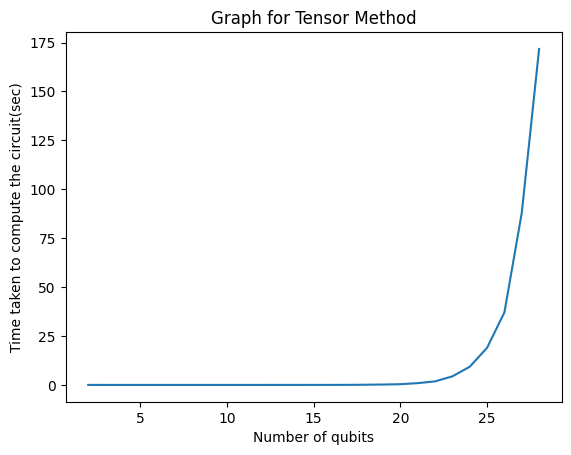

In [22]:
num_qubits=np.arange(2,29)
plt.title('Graph for Tensor Method')
plt.xlabel('Number of qubits')
plt.ylabel('Time taken to compute the circuit(sec)')
plt.plot(num_qubits, t_tensor)
plt.show()

# Comparing the methods

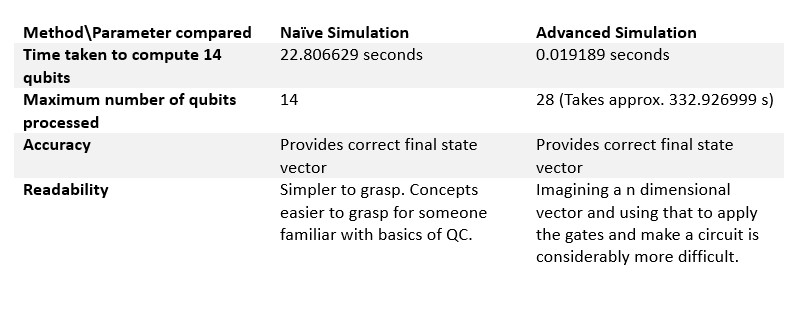